# Customer Churn Prediction:
A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.
Your task as a data scientist would be to predict the propensity to churn for each customer.

## Data Dictionary
There are multiple variables in the dataset which can be cleanly divided into 3 categories:

## I. Demographic information about customers

       •	customer_id - Customer id 
       •	vintage - Vintage of the customer with the bank in a number of days 
       •	age - Age of customer 
       •	gender - Gender of customer 
       •	dependents - Number of dependents 
       •	occupation - Occupation of the customer 
       •	city - City of the customer (anonymized) 
       
## II. Customer Bank Relationship

       •	customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 
       •	branch_code - Branch Code for a customer account 
       •	days_since_last_transaction - No of Days Since Last Credit in Last 1 year 

## III. Transactional Information
       •	current_balance - Balance as of today 
       •	previous_month_end_balance - End of Month Balance of previous month 
       •	average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 
       •	average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter 
       •	current_month_credit - Total Credit Amount current month 
       •	previous_month_credit - Total Credit Amount previous month 
       •	current_month_debit - Total Debit Amount current month 
       •	previous_month_debit - Total Debit Amount previous month 
       •	current_month_balance - Average Balance of current month 
       •	previous_month_balance - Average Balance of previous month 
       •	churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing churn_prediction dataset

In [ ]:
churn_data = pd.read_csv("churn_prediction.csv")
churn_data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# Filling missing values with pandas

In [ ]:
df = churn_data.copy()

In [ ]:
df.occupation.value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [ ]:
df["city"].fillna(value = 0.0, inplace = True)
df["city"] = df["city"].astype("int")

In [ ]:
df["occupation"].fillna(value = "missing", inplace = True)

In [ ]:
df["occupation_with_missing_data"] = pd.Categorical(df["occupation"]).codes

In [ ]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,0,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [ ]:
df["gender"].fillna(value = "missing", inplace = True)

In [ ]:
df["dependents"].fillna(value = 0.0, inplace = True)

In [ ]:
df["dependents"] = churn_data["dependents"].astype("int")

In [ ]:
df.head().T

,0,1,2,3,4
customer_id,1,2,4,5,6
vintage,3135,310,2356,478,2531
age,66,35,31,90,42
gender,Male,Male,Male,missing,Male
dependents,0,0,0,0,2
occupation,self_employed,self_employed,salaried,self_employed,self_employed
city,187,0,146,1020,1494
customer_nw_category,2,2,2,2,3
branch_code,755,3214,41,582,388
days_since_last_transaction,224,60,NaN,147,58


In [ ]:
df.isna().sum()

customer_id                          0
vintage                              1
age                                  1
gender                               0
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 1
branch_code                          1
days_since_last_transaction       1978
current_balance                      1
previous_month_end_balance           1
average_monthly_balance_prevQ        1
average_monthly_balance_prevQ2       1
current_month_credit                 1
previous_month_credit                1
current_month_debit                  1
previous_month_debit                 1
current_month_balance                1
previous_month_balance               1
churn                                1
occupation_with_missing_data         0
dtype: int64

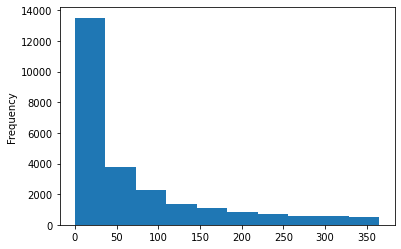

In [ ]:
df["days_since_last_transaction"].plot.hist()

In [ ]:
df.dtypes

customer_id                         int64
vintage                           float64
age                               float64
gender                             object
dependents                          int64
occupation                         object
city                                int64
customer_nw_category              float64
branch_code                       float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                             float64
occupation_with_missing_data         int8
dtype: object

In [ ]:
df["days_since_last_transaction"].fillna(value = df["days_since_last_transaction"].median(), inplace = True)

In [ ]:
df.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [ ]:
df.drop("occupation", axis = 1, inplace = True)

# Modelling

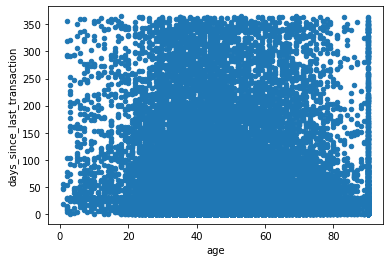

In [ ]:
df.plot.scatter('age', 'days_since_last_transaction')

# Droping the target column

Two Variable are created namely X and y.
* X stores the data set except the target column Churn
* y stores only the target column 

In [ ]:
X = df.drop("churn",axis = 1)
y = df["churn"]

# Encoding categorical variable with OnehotEncoder

In [ ]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'occupation_with_missing_data'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["gender"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 2.000000e-01,
        1.458710e+03, 1.458710e+03],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 1.005600e+02,
        6.496780e+03, 8.787610e+03],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 2.592300e+02,
        5.006280e+03, 5.070140e+03],
       ...,
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 7.180000e+01,
        6.107850e+04, 5.756424e+04],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 2.000000e-01,
        1.625550e+03, 1.625550e+03],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 1.094090e+03,
        2.402620e+03, 3.260580e+03]])

# Different classification model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)


clf = RandomForestClassifier(n_estimators = 20)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8603135458869121

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 100, n_jobs = -1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8316011978157477

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.8374141271798485

# confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

preds = clf.predict(X_test)
print("confusion matrix:\n " , confusion_matrix( y_test, preds))
print("accuracy score:\n", accuracy_score(y_test, preds))
print("classification_report:\n\n", classification_report( y_test, preds))

confusion matrix:
  [[4474  165]
 [ 628  410]]
accuracy score:
 0.8603135458869121
classification_report:

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      4639
           1       0.71      0.39      0.51      1038

    accuracy                           0.86      5677
   macro avg       0.79      0.68      0.71      5677
weighted avg       0.85      0.86      0.84      5677



In [ ]:
preds = model.predict(X_test)
print("confusion matrix:\n " , confusion_matrix( y_test, preds))
print("\n\naccuracy score:\n", accuracy_score(y_test, preds))
print("\n\nclassification_report:\n\n", classification_report( y_test, preds))

confusion matrix:
  [[4605   34]
 [ 922  116]]


accuracy score:
 0.8316011978157477


classification_report:

               precision    recall  f1-score   support

           0       0.83      0.99      0.91      4639
           1       0.77      0.11      0.20      1038

    accuracy                           0.83      5677
   macro avg       0.80      0.55      0.55      5677
weighted avg       0.82      0.83      0.78      5677



In [ ]:
preds = model2.predict(X_test)
print("confusion matrix:\n " , confusion_matrix( y_test, preds))
print("\n\naccuracy score:\n", accuracy_score(y_test, preds))
print("\n\nclassification_report:\n\n", classification_report( y_test, preds))

confusion matrix:
  [[4419  220]
 [ 703  335]]


accuracy score:
 0.8374141271798485


classification_report:

               precision    recall  f1-score   support

           0       0.86      0.95      0.91      4639
           1       0.60      0.32      0.42      1038

    accuracy                           0.84      5677
   macro avg       0.73      0.64      0.66      5677
weighted avg       0.82      0.84      0.82      5677



# Hyperparameter tuning

## Hyperparameter tuning for KNN

In [ ]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 84.59%


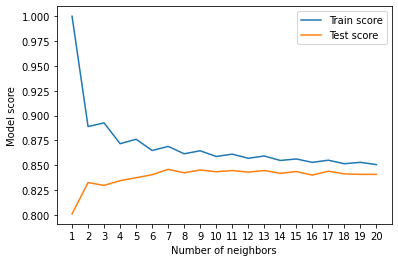

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [ ]:
model3 = KNeighborsClassifier(n_neighbors = 6)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.8404086665492337

In [ ]:
model3 = KNeighborsClassifier(n_neighbors = 7)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.8458692971639951

In [ ]:
from sklearn.model_selection import cross_val_score

model3 = KNeighborsClassifier(n_neighbors = 7)
model_cv = cross_val_score(model3, transformed_X, y, cv = 5)                         

In [ ]:
model_cv = cross_val_score(model3, transformed_X, y, cv = 5, scoring = "recall")     

In [ ]:
model_cv

array([0.26330798, 0.32319392, 0.35456274, 0.30893536, 0.21007605])

In [ ]:
model_cv.mean()

0.2920152091254753

## Hyperparameter tuning for Logistic Regression

In [ ]:
log_reg_grid = { "C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                n_jobs = -1,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': ar...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [ ]:
rs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
model = LogisticRegression( C = 0.615848211066026,
                           solver = "liblinear")
model.fit(X_train,y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8312488990664083

In [ ]:
rs_log_reg.score(X_test,y_test)

0.8312488990664083

In [ ]:
print("classification_report:\n\n", classification_report( y_test, preds))

classification_report:

               precision    recall  f1-score   support

           0       0.86      0.95      0.91      4639
           1       0.60      0.32      0.42      1038

    accuracy                           0.84      5677
   macro avg       0.73      0.64      0.66      5677
weighted avg       0.82      0.84      0.82      5677



In [ ]:
from sklearn.model_selection import GridSearchCV

gs_clf = GridSearchCV(LogisticRegression() ,
                      param_grid = log_reg_grid,
                      cv = 5,
                      n_jobs = -1,
                      verbose = 2,
                      refit = True
                     )

gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.636...,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
     

In [ ]:
gs_clf.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
gs_clf.score(X_test,y_test)

0.8312488990664083

## Hyper-parameter Tuning for RandomForestClassifier()

### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {"n_estimators": [10,100,200],
            "max_depth": [None,10,20],
            "min_samples_split": [2],
            "max_features": ["auto", "sqrt"],
            "min_samples_leaf": [1,4]}

clf = RandomForestClassifier()

rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = rs_grid,
                            n_jobs = -1,
                            n_iter = 10,
                            cv = 5,
                            verbose = 2,
                            random_state = 42,
                            refit = True)

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rs_clf.score(X_test,y_test)

0.8661264752510128

In [ ]:
clf = RandomForestClassifier( max_depth = 20,
                          max_features = 'sqrt',
                          min_samples_leaf= 4,
                          min_samples_split= 2,
                          n_estimators = 200)

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

gs_grid = {"n_estimators": [20,100,200],
           "max_depth": [10,20],
           "max_features": ["auto", "sqrt"],
           "min_samples_split": [2],
           "min_samples_leaf": [1,2,4]}

clf = RandomForestClassifier()

gs_clf = GridSearchCV(estimator = clf,
                      param_grid = gs_grid,
                      cv = 5,
                      n_jobs = -1,
                      verbose = 2,
                      refit = True
                     )

gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 13.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
gs_clf.score(X_test,y_test)

0.866654923375022

In [ ]:
clf = RandomForestClassifier( max_depth = 20,
                          max_features = 'sqrt',
                          min_samples_leaf= 2,
                          min_samples_split= 2,
                          n_estimators = 200)

## Best Parameters

In [ ]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv = 5,
                         scoring = "accuracy")
cv_acc

array([0.86595033, 0.86665492, 0.86205074, 0.86909796, 0.86028894])

In [ ]:
cv_acc.mean()

0.8648085762773345

In [ ]:
cv_pre = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv = 5,
                         scoring = "precision")
cv_pre

array([0.75      , 0.71674491, 0.71361502, 0.74677419, 0.74597496])

In [ ]:
cv_rec = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv = 5,
                         scoring = "recall")
cv_rec

array([0.4039924 , 0.43536122, 0.44011407, 0.44486692, 0.37072243])

In [ ]:
cv_f1 = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv = 5,
                         scoring = "f1")
cv_f1

array([0.53259533, 0.54620853, 0.54502649, 0.55209581, 0.51407129])

In [ ]:
cv_rec.mean()

0.4190114068441065

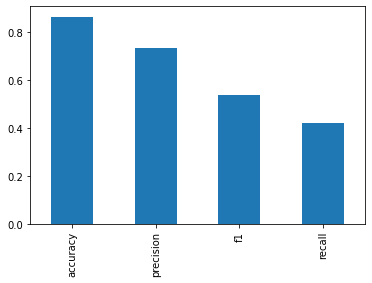

In [ ]:
cv_metrics = pd.DataFrame({"accuracy": cv_acc.mean(),
                           "precision": cv_pre.mean(),
                           "f1": cv_f1.mean(),
                           "recall": cv_rec.mean()},
                          index = [0])
cv_metrics.T.plot.bar(legend = False)

# Export

In [ ]:
import pickle
filename = "finalized_model.save"
pickle.dump(clf, open(filename, "wb"))

In [ ]:
loaded_model = pickle.load(open(filename,"rb"))
loaded_model.fit(X_train,y_train)
result =loaded_model.score(X_test,y_test)
print(result)

0.8670072221243614
